<a href="https://colab.research.google.com/github/v1s2k/AKMS/blob/main/%D0%9F%D1%80_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
! unzip '/content/archive.zip'


Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.10.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.100.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.101.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.102.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.103.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.104.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.105.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.106.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.107.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.108.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.109.jpg  
  inflati

In [15]:
! ls

archive.zip  cats_and_dogs_filtered  drive  sample_data


In [16]:
!ls cats_and_dogs_filtered/

cats_and_dogs_filtered	train  validation  vectorize.py


In [17]:
!ls cats_and_dogs_filtered/train

cats  dogs


In [19]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

from torch import *
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score

In [23]:
transform_train = transforms.Compose(
    [transforms.Resize((50,50)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485,0.456,0.406],
                          std=[0.229,0.224,0.225])
])
transform_val =  transforms.Compose(
    [transforms.Resize((50,50)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485,0.456,0.406],
                          std=[0.229,0.224,0.225])
])

In [24]:
train_data = datasets.ImageFolder("cats_and_dogs_filtered/train",transform=transform_train)
test_data = datasets.ImageFolder("cats_and_dogs_filtered/validation",transform = transform_val)

In [26]:
train_data

Dataset ImageFolder
    Number of datapoints: 2000
    Root location: cats_and_dogs_filtered/train
    StandardTransform
Transform: Compose(
               Resize(size=(50, 50), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [31]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=len(test_data), shuffle=False)


In [33]:
dataiter = iter(train_loader)

images, labels = next(dataiter)


In [34]:
images.shape

torch.Size([32, 3, 50, 50])

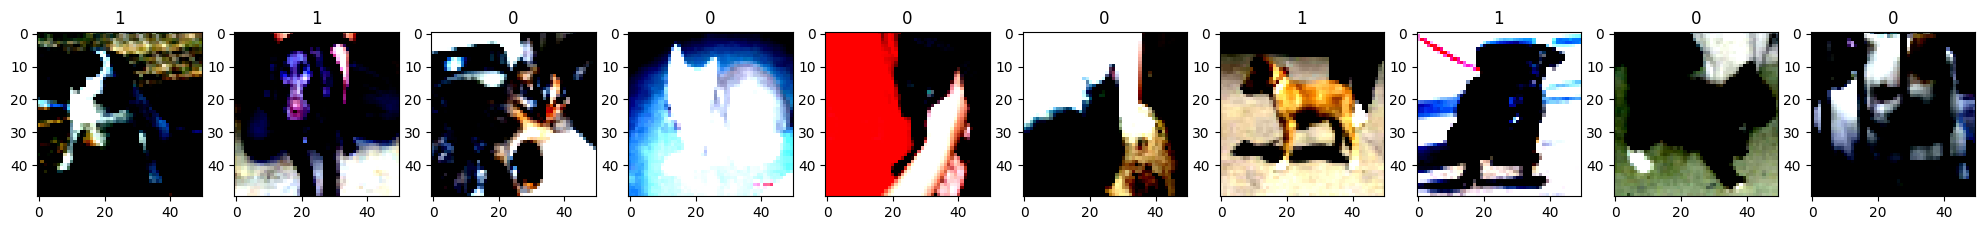

In [46]:
def show_imgs(imgs,labels):
  f,axes = plt.subplots(1,10,figsize = (25,5))
  for i, axis in enumerate(axes):
    axes[i].imshow(np.squeeze(np.transpose(imgs[i].numpy(),(1,2,0))),cmap='gray')
    axes[i].set_title(labels[i].numpy())
  plt.show()

show_imgs(images,labels)